In [ ]:
# Define model
import keras.layers as L
import keras.losses as losses
import keras.models as M
import keras.optimizers as opt
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy 
import re
from sklearn import metrics #cross_validation 
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
# Plot settings
plt.style.use('seaborn-dark-palette')
plt.interactive(True)
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
# GLoVE vector dictionary
vector = None

In [ ]:
df = pd.read_csv('/content/task_1_information_extraction_training_set.tsv',sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df.shape)

(115668, 30)


counter1: Counter({'Jammu': 2459, 'Srinagar': 1656, 'Delhi - New Delhi': 1404, 'Chandigarh': 1187, 'Ludhiana': 1093, 'Bathinda': 954, 'Amritsar': 872, 'Hyderabad': 861, 'Imphal': 813, 'Kolkata': 796, 'New York - Manhattan': 794, 'Bengaluru': 683, 'Guwahati': 674, 'Chennai': 630, 'Patiala': 608, 'Agartala': 571, 'Jalandhar': 558, 'Lucknow': 477, 'Patna': 463, 'Visakhapatnam': 459, 'Bhubaneswar': 449, 'Thiruvananthapuram': 441, 'Coimbatore': 440, 'Siliguri': 423, 'Salem': 398, 'Dehradun': 397, 'Madurai': 389, 'Ranchi': 376, 'Udhampur': 351, 'Mumbai': 346, 'San Francisco': 345, 'New York - Brooklyn': 330, 'Philadelphia': 321, 'Vijayawada': 320, 'Tarn Taran': 300, 'Boston': 300, 'Washington DC': 300, 'Kathua': 293, 'Atlanta': 293, 'San Diego': 284, 'Puducherry': 283, 'Sangrur': 278, 'Jaipur': 277, 'Pune': 273, 'Kochi': 263, 'Seattle': 262, 'Tiruchirappalli': 251, 'Gurgaon': 248, 'Portland': 244, 'Mohali': 236, 'Jamshedpur': 229, 'Sacramento': 229, 'Los Angeles-Central': 229, 'Bhopal': 228,

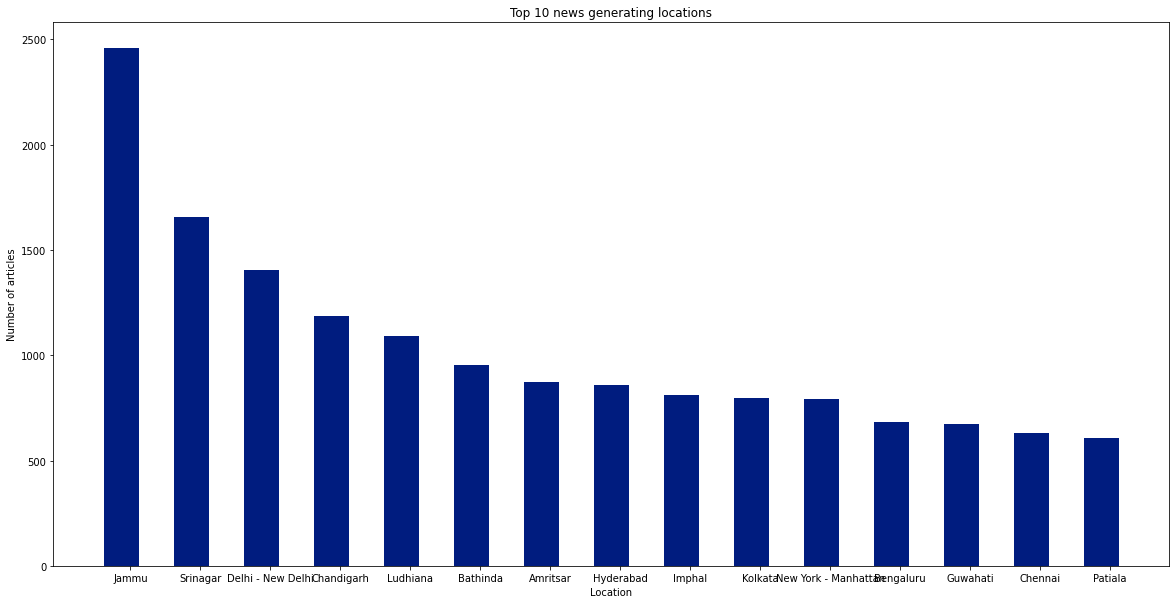

In [ ]:
counter = Counter(df.LOCATION)
print("counter1: {}".format(counter))
counter = sorted(counter.items(), key=lambda x: -x[1])[:15]
print("counter2: {}".format(counter))
counter = np.array(counter)

print ([x[0] for x in counter])

places, counts = counter[:, 0].tolist(), counter[:, 1].astype(np.float32)
indices = np.arange(len(counts))
width = 1

plt.xlabel("Location")
plt.ylabel("Number of articles")
plt.interactive(True)

plt.xticks(indices + 0.125, places)
plt.title("Top 10 news generating locations")
_ = plt.bar(indices, counts, 0.5)

In [ ]:
month_map = {'January':'1', 'February':'2', 'March':'3', 'April':'4', 'May':'5', 'June':'6', 'July':'7', 'August': '8', 'September':'9', 'October':'10', 'November':'11','December':'12'}
df['EVENT_DATE'] = df['EVENT_DATE'].apply(lambda st: str(st))
df['month'] = df['EVENT_DATE'].map(lambda st: st[st.find("-")+1:st.rfind("-")])
df = df[df['month'] != 'na']
df = df[df['month'] != 'us']  
df['EVENT_DATE'] = df['EVENT_DATE'].map(lambda st: st[:st.find("-")+1] + month_map[st[st.find("-")+1:st.rfind("-")]] + st[st.rfind("-"):])
df['EVENT_DATE'].value_counts()

06-6-2020     751
31-5-2020     670
01-6-2020     597
02-6-2020     562
30-5-2020     552
             ... 
01-3-2018      17
24-6-2018      14
21-3-2020      13
14-7-2018      11
27-10-2019      9
Name: EVENT_DATE, Length: 1482, dtype: int64

In [ ]:
print(df['EVENT_DATE'])

0         01-1-2018
1         01-1-2018
2         01-1-2018
3         01-1-2018
4         01-1-2018
            ...    
115663    21-1-2022
115664    21-1-2022
115665    21-1-2022
115666    21-1-2022
115667    21-1-2022
Name: EVENT_DATE, Length: 115664, dtype: object


In [ ]:
dates = pd.date_range(start=df.iloc[0]['EVENT_DATE'], end=df.iloc[-1]['EVENT_DATE'])
print("Number of days ", len(dates))

Number of days  1482


In [ ]:
#dates[0], dates[-1]

In [ ]:
print(dates)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', length=1482, freq='D')


In [ ]:
print(len(dates))

1482


In [ ]:
df["EVENT_DATE_to_datetime"] = pd.to_datetime(df["EVENT_DATE"])

In [ ]:
event_date_list = df["EVENT_DATE"].tolist()
print(event_date_list)

['01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '01-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018', '02-1-2018'

In [ ]:
import datetime
df = df[df['LOCATION'] == "Jammu"]

num_events = np.zeros(len(dates))
i = 0
for date in dates:
    #print(type(df['EVENT_DATE']))
    # list1=str(df['EVENT_DATE']).split('-')
    # date1=datetime.datetime(int(list1[2],list1[1],list1[0])
    #date_object=datetime.datetime.strptime((df['EVENT_DATE']),'%Y-%m-%d')
    #print(date_object)
    #.strftime('%Y-%m-%d')
    num_events[i] += len(df[df["EVENT_DATE_to_datetime"] == date])
    i += 1

In [ ]:
print(dates)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', length=1482, freq='D')


In [ ]:
print(num_events)

[2. 3. 0. ... 1. 1. 2.]


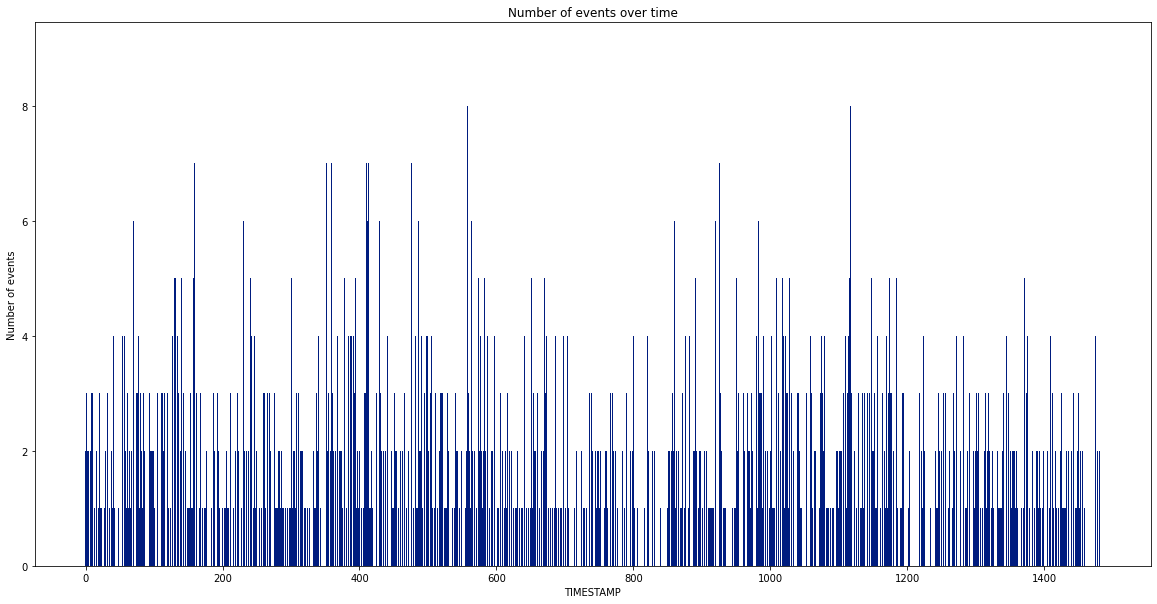

In [ ]:
plt.title("Number of events over time")
plt.xlabel("TIMESTAMP")
plt.ylabel("Number of events")
_ = plt.bar(np.arange(len(num_events)), num_events)
# _ = plt.bar(np.arange(len(num_events)), num_events)

In [ ]:
news_articles = df.NOTES
df.shape

(2459, 32)

In [ ]:
def get_glove_dict():
    """
    Inputs - None
    
    Returns - Dict below
    
    Create a dict with word as key and word vector as value
    """
    d = {}
    f = open('/content/glove.6B.300d.txt', 'r')
    for row in f:
        row = row.replace('\n', '').split(" ")
        word = row[0]
        vector = np.array([float(x) for x in row[1:]])
        d[word] = vector
    f.close()
    return d

def generate_labels(num_events, num_days=2, days_window=2):
    """
    Inputs - 
        num_events - as generated as above 
        num_days - the number of days to after which we 
                   look for the occurence of an event.
                   Basically, the future
        day_window - If an event occurs in a window of days
                     after num_days
    
    Returns - Returns labels generated as below
    
    Generate labels by using the future events, basically
    look-ahead to create labels. If an event occurs from 
    i to i + num_days, then label is 1.0 else 0.0
    """
    n = len(num_events)
    labels = np.zeros(n - num_days - days_window)
    for i in range(n - num_days - days_window):
        labels[i] = 1.0 if sum(num_events[i + num_days: i + num_days + days_window] > 0) else 0.0
    return labels
    

In [ ]:
if vector is None:
    vector = get_glove_dict()

ValueError: ignored

In [ ]:
num_days, days_window = 2, 5
labels = generate_labels(num_events, num_days, days_window)

In [ ]:
plt.title('Label Distribution')
plt.xlabel('Ground Truth')
plt.ylabel('hasEventOcurred')
_ = plt.hist(labels, bins=3, range=(0, 1))

In [ ]:
# Tokenizer
nlp = spacy.load('en_core_web_sm')

# Generate sentence vectors
sentence_vectors = []
regexp = r'/[.,\/#!$%\^&\*;:{}=\-_`~()]/g'
num_sentences = len(news_articles)
print(num_sentences)
for i, sentence in enumerate(news_articles):
    if i % 100 == 0:
        print (i, " / ", num_sentences, "done!")
    tokens = [t.text.lower() for t in nlp(sentence)]
    temp = []
    for token in tokens:
        vec = vector.get(token)
        """if vec is None:
            vec = vector['unk']"""
        temp.append(vec)
    sentence_vectors.append(temp)
            

In [ ]:
# For the sentence vector, currently, simply just use average of all words vectors
for i, vecs in enumerate(sentence_vectors):
    #print(sentence_vectors[i])
    sentence_vectors[i] = np.mean(vec, axis=0)

In [ ]:
sentence_vectors = np.array(sentence_vectors)
print("Sentence vector shape -", sentence_vectors.shape)

vector_dim = sentence_vectors.shape[0]

In [ ]:
df.index = np.arange(len(df))
df.head(5)

In [ ]:
sentence_dict = {}
for date in dates:
    temp_df = df[df['EVENT_DATE'] == date]
    
    if len(temp_df) == 0:
        sentence_dict[date] = (np.zeros(vector_dim))

    else:
        indices = list(temp_df.index)
        sentence_dict[date] = sentence_vectors[indices]

### Using average of averages

In [ ]:
print()

In [ ]:

vec_date = []
#print(sentence_dict)
for date in dates:
    arr = sentence_dict[date]  #.reshape(-1, vector_dim)
    vec_date.append(np.mean(arr, axis=0))

print(vec_date)

In [ ]:
history = 5
n = len(dates)

In [ ]:
x, y = [], []
for i in range(history, n - num_days - days_window):
    x.append(vec_date[i - history: i])
    y.append(labels[i])

In [ ]:
x, y = np.array(x), np.array(y)
# p = np.random.permutation(len(x))
# x, y = x[p], y[p]

In [ ]:
print(x.shape, y.shape)
print(y[:5])

In [ ]:
split = int(len(x) * 0.8)
xtrain, xtest = x[:split], x[split:]
ytrain, ytest = y[:split], y[split:]
ytrain, ytest = to_categorical(ytrain), to_categorical(ytest)

In [ ]:
print( 'xtrain', xtrain.shape)
print( 'ytrain', ytrain.shape)
print( 'xtest', xtest.shape)
print( 'ytest', ytest.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import  tensorflow as tf



In [ ]:
print(history, vector_dim)    #this is the input shape
print(xtrain.shape[1], 1)
model = M.Sequential()
#model.add(L.LSTM(30, return_sequences=True, input_shape=(history, vector_dim)))# , kernel_size=3))
model.add(L.LSTM(30, return_sequences=True, input_shape=(history, 1)))# , kernel_size=3))
model.add(L.LeakyReLU())
model.add(L.Dropout(0.2))

#model.add(L.LSTM(15, input_shape=(history, vector_dim)))# , kernel_size=3))
model.add(L.LSTM(15))# , kernel_size=3))
model.add(L.LeakyReLU())
model.add(L.Dropout(0.2))

# model.add(L.GlobalMaxPool1D())

model.add(L.Dense(10))

model.add(L.Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.SGD
opzr = tf.keras.optimizers.Adam(0.001)
model.compile(opzr, loss=losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

In [ ]:
print('Train shape -', xtrain.shape)
print('Test shape -', xtest.shape)

In [ ]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), batch_size=32, epochs=20)

In [ ]:
pred = model.predict(xtest)
if len(pred.shape) == 1:
    ytest_ = ytest
else:
    pred = model.predict(xtest) [:, 1]
    threshold = 0.68
    pred[pred > threshold] = 1
    pred[pred <= threshold] = 0
    ytest_ = np.argmax(ytest, axis=1)

In [ ]:
print(metrics.classification_report(ytest_, pred))

In [ ]:
conf_mat = metrics.confusion_matrix(ytest_, pred)
# conf_mat = conf_mat * 100. / np.sum(conf_mat, axis=1, keepdims=True)


In [ ]:
conf_mat

In [ ]:
history = 5
n = len(dates)

In [ ]:
x, y = [], []
for date in dates:
    sentence_vecs = sentence_dict[date]
    